In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

MNIST DATASET


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train_full, y_train_full),(x_test_full,y_test_full) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


Perform Normalization


In [5]:
x_train_full = x_train_full/255.0
x_test_full = x_test_full/255.0

Model 0:

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 36
epochs = 20

history0 = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/20
1500/1500 [==============================] - 16s 3ms/step - loss: 0.1514 - accuracy: 0.9557 - val_loss: 0.0577 - val_accuracy: 0.9840
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0441 - val_accuracy: 0.9883
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0453 - val_accuracy: 0.9872
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0435 - val_accuracy: 0.9888
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0458 - val_accuracy: 0.9888
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0525 - val_accuracy

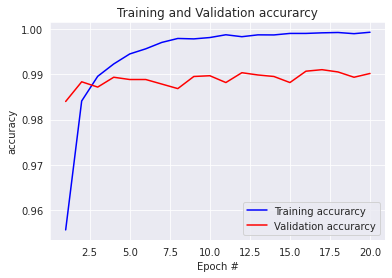

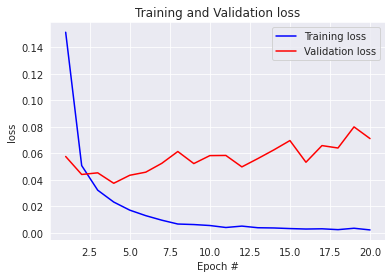

In [9]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history0.history['accuracy']
val_acc = history0.history['val_accuracy']
loss = history0.history['loss']
val_loss = history0.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()


In [10]:
model.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9891


[0.06654983013868332, 0.9890999794006348]

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred01 = model.predict(x_test_full, len(y_test_full)//batch_size)


In [12]:
y_pred01 = np.argmax(Y_pred01, axis=1)

In [13]:
print('Confusion Matrix')
cm1 = confusion_matrix(y_test_full, y_pred01)
#cm = confusion_matrix(test_RGB_y, y_pred01)
print(cm1)

Confusion Matrix
[[ 978    0    1    1    0    0    0    0    0    0]
 [   0 1132    1    0    1    0    1    0    0    0]
 [   2    6 1016    1    0    0    1    5    1    0]
 [   0    0    1  993    0   11    0    0    5    0]
 [   1    2    0    0  965    0    6    0    0    8]
 [   1    1    0    3    0  885    2    0    0    0]
 [   4    2    0    0    1    1  948    0    2    0]
 [   0    1    5    1    0    1    0 1015    2    3]
 [   3    0    0    0    1    0    0    0  965    5]
 [   0    1    0    0    5    5    0    3    1  994]]


In [14]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred01))

Accuracy 0.9891


Model 1:

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               320100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 36
epochs = 20

history1 = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1195 - accuracy: 0.9624 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9880 - val_loss: 0.0455 - val_accuracy: 0.9872
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0407 - val_accuracy: 0.9893
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0621 - val_accuracy: 0.9843
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0337 - val_accuracy: 0.9917
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0383 - val_accuracy: 0.9910
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0424 - val_accuracy:

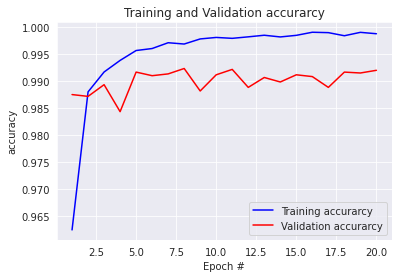

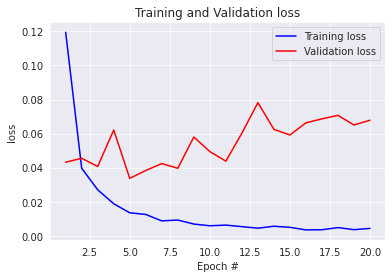

In [17]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [18]:
model.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9908


[0.0511627197265625, 0.9908000230789185]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred02 = model.predict(x_test_full, len(y_test_full)//batch_size)

In [20]:
y_pred02 = np.argmax(Y_pred02, axis=1)

In [21]:
print('Confusion Matrix')
cm2 = confusion_matrix(y_test_full, y_pred02)
#cm = confusion_matrix(test_RGB_y, y_pred02)
print(cm2)

Confusion Matrix
[[ 972    1    2    0    0    0    3    0    1    1]
 [   0 1131    0    0    0    3    0    0    0    1]
 [   0    5 1013    0    1    0    0   11    2    0]
 [   0    1    1 1003    0    3    0    2    0    0]
 [   0    1    0    0  977    0    0    0    1    3]
 [   1    0    0    1    0  888    1    1    0    0]
 [   2    4    0    0    1    2  946    0    3    0]
 [   0    1    2    0    0    0    0 1022    1    2]
 [   2    0    1    1    1    2    1    0  963    3]
 [   0    0    2    0    4    7    0    3    0  993]]


In [22]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred02))

Accuracy 0.9908


Model 3:


In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation="tanh", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation="tanh", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation="sigmoid"))
model.add(tf.keras.layers.Dense(84, activation="sigmoid"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 36
epochs = 20

history2 = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3759 - accuracy: 0.9031 - val_loss: 0.0930 - val_accuracy: 0.9742
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0862 - accuracy: 0.9746 - val_loss: 0.0692 - val_accuracy: 0.9800
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.0553 - val_accuracy: 0.9842
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0476 - val_accuracy: 0.9868
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.0444 - val_accuracy: 0.9865
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0480 - val_accuracy:

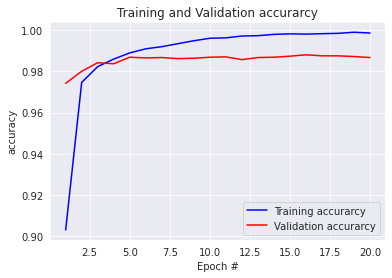

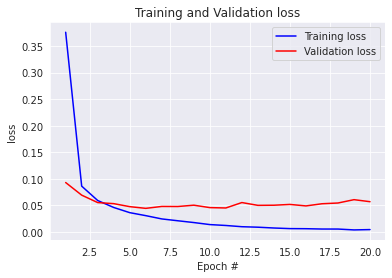

In [25]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [26]:
model.evaluate(x_test_full, y_test_full)


313/313 [==============================] - 1s 3ms/step - loss: 0.0558 - accuracy: 0.9864


[0.055846381932497025, 0.9864000082015991]

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred03 = model.predict(x_test_full, len(y_test_full)//batch_size)

In [28]:
y_pred03 = np.argmax(Y_pred03, axis=1)

In [29]:
print('Confusion Matrix')
cm3 = confusion_matrix(y_test_full, y_pred03)
#cm = confusion_matrix(test_RGB_y, y_pred03)
print(cm3)

Confusion Matrix
[[ 970    0    4    0    0    1    0    1    3    1]
 [   0 1127    1    1    0    0    2    2    2    0]
 [   0    0 1028    1    0    0    0    2    1    0]
 [   0    0    4  999    0    2    0    2    3    0]
 [   0    0    2    0  968    0    3    1    2    6]
 [   2    1    0    9    0  872    1    1    4    2]
 [   4    2    2    0    2    3  942    0    3    0]
 [   0    8    7    4    1    0    0 1005    0    3]
 [   1    0    3    2    0    2    0    1  962    3]
 [   1    1    0    2    4    3    1    3    3  991]]


In [30]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred03))

Accuracy 0.9864


CIFAR-10 DATASET

In [31]:
cifar10 = tf.keras.datasets.cifar10

In [32]:
(x_train_full, y_train_full),(x_test_full,y_test_full) = cifar10.load_data() 

170508288/170498071 [==============================] - 2s 0us/step


Perform Normalization

In [33]:
x_train_full = x_train_full/255.0
x_test_full = x_test_full/255.0

Model 4:


In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               627300    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 36
epochs = 20

history3 = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5327 - accuracy: 0.4556 - val_loss: 1.3695 - val_accuracy: 0.5102
Epoch 2/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2459 - accuracy: 0.5605 - val_loss: 1.2138 - val_accuracy: 0.5718
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1313 - accuracy: 0.6030 - val_loss: 1.1150 - val_accuracy: 0.6114
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0307 - accuracy: 0.6392 - val_loss: 1.0850 - val_accuracy: 0.6354
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9526 - accuracy: 0.6654 - val_loss: 1.0792 - val_accuracy: 0.6292
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8891 - accuracy: 0.6875 - val_loss: 1.1020 - val_accuracy: 0.6240
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8283 - accuracy: 0.7091 - val_loss: 1.1337 - val_accuracy:

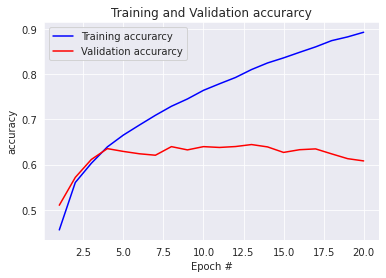

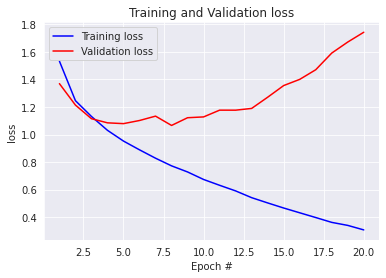

In [37]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [38]:
model.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 1.7990 - accuracy: 0.6076


[1.7989954948425293, 0.6075999736785889]

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred04 = model.predict(x_test_full, len(y_test_full)//batch_size)

In [40]:
y_pred04 = np.argmax(Y_pred04, axis=1)

In [41]:
print('Confusion Matrix')
cm4 = confusion_matrix(y_test_full, y_pred04)
#cm = confusion_matrix(test_RGB_y, y_pred04)
print(cm4)


Confusion Matrix
[[712  22  68  18  34   3  21  16  73  33]
 [ 41 723  14  10  10   7  12   3  46 134]
 [ 85  17 466  45 170  73  64  44  17  19]
 [ 45  18 123 341 110 148 106  47  25  37]
 [ 42   5  94  45 621  39  46  80  16  12]
 [ 23  14 124 154  89 430  47  79  21  19]
 [ 15  19  57  47 108  29 683  20  11  11]
 [ 29  12  45  38 115  50  16 660   9  26]
 [103  44  22  11  13   8   6   6 755  32]
 [ 66 129  16  15   8  10  11  13  47 685]]


In [42]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred04))

Accuracy 0.6076


Model 5:

In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation="relu", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_9 (Dense)             (None, 100)               460900    
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                      

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 36
epochs = 20

history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4881 - accuracy: 0.4652 - val_loss: 1.2406 - val_accuracy: 0.5560
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1575 - accuracy: 0.5909 - val_loss: 1.1370 - val_accuracy: 0.5922
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0094 - accuracy: 0.6446 - val_loss: 1.0773 - val_accuracy: 0.6196
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8911 - accuracy: 0.6873 - val_loss: 1.0885 - val_accuracy: 0.6258
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7942 - accuracy: 0.7228 - val_loss: 1.0338 - val_accuracy: 0.6496
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7042 - accuracy: 0.7515 - val_loss: 1.0836 - val_accuracy: 0.6462
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6180 - accuracy: 0.7835 - val_loss: 1.1011 - val_accuracy:

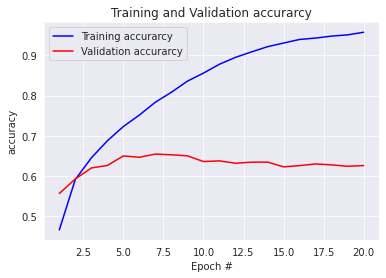

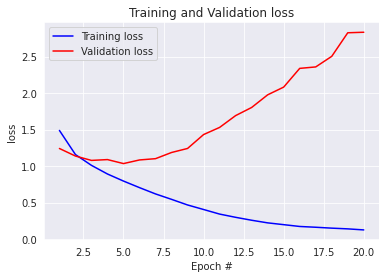

In [45]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [46]:
model.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 2.9636 - accuracy: 0.6107


[2.9636409282684326, 0.6107000112533569]

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred05 = model.predict(x_test_full, len(y_test_full)//batch_size)

In [48]:
y_pred05 = np.argmax(Y_pred05, axis=1)

In [49]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred05))

Accuracy 0.6107


Model 6:

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation="tanh", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
 
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation="tanh", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation="sigmoid"))
model.add(tf.keras.layers.Dense(84, activation="sigmoid"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_11 (Dense)            (None, 120)              

In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 32
epochs = 20

history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7111 - accuracy: 0.3757 - val_loss: 1.4714 - val_accuracy: 0.4704
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4053 - accuracy: 0.4939 - val_loss: 1.3150 - val_accuracy: 0.5326
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2830 - accuracy: 0.5367 - val_loss: 1.2414 - val_accuracy: 0.5560
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1990 - accuracy: 0.5723 - val_loss: 1.1918 - val_accuracy: 0.5770
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1335 - accuracy: 0.5965 - val_loss: 1.1469 - val_accuracy: 0.5832
Epoch 6/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0762 - accuracy: 0.6169 - val_loss: 1.1536 - val_accuracy: 0.5800
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0302 - accuracy: 0.6348 - val_loss: 1.1023 - val_accuracy:

In [52]:
model.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 1.2108 - accuracy: 0.6150


[1.2108380794525146, 0.6150000095367432]

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred06 = model.predict(x_test_full, len(y_test_full)//batch_size)

In [54]:
y_pred06 = np.argmax(Y_pred06, axis=1)

In [55]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred06))

Accuracy 0.615


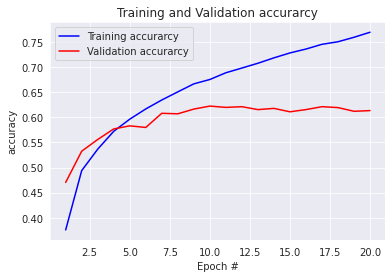

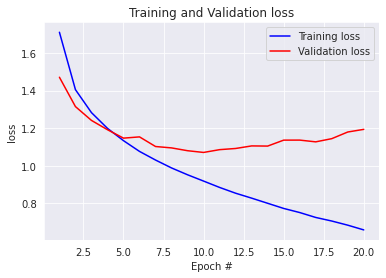

In [56]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

Performance Comparison:

In [ ]:
'''
MNIST DATASET:
TEST ACCURACY FOR [1-CONV LAYER, 2-CONV LAYER, LeNet5 Architecture] = [98.91, 99.08, 98.64]
We get higher accuracies for MNIST DATASET. There is very less overfitting in the dataset. Back to Back two layer CNN performs the best out of all the three
architectures.


CIFAR-10 DATASET:
TEST ACCURACY FOR [1-CONV LAYER, 2-CONV LAYER, LeNet5 Architecture] = [60.76,61.07, 61.50]
We again get higher accuracy for LeNet Architecture for this dataset. We'll try to optimise the architecture to obtain improved accuracy for LeNet architecture 
on CIFAR10 DATASET. 


'''

'\n\n\n'

Performance Optimisation for the LeNet Architecture Model of CIFAR-10 DATASET

In [66]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation="tanh", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation="tanh", padding="valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation="sigmoid"))
model.add(tf.keras.layers.Dense(84, activation="sigmoid"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 6)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)         

In [67]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 22
epochs = 40

history = model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/40
2046/2046 [==============================] - 10s 4ms/step - loss: 1.7571 - accuracy: 0.3547 - val_loss: 1.5291 - val_accuracy: 0.4440
Epoch 2/40
2046/2046 [==============================] - 8s 4ms/step - loss: 1.4980 - accuracy: 0.4584 - val_loss: 1.4223 - val_accuracy: 0.4872
Epoch 3/40
2046/2046 [==============================] - 8s 4ms/step - loss: 1.4003 - accuracy: 0.4960 - val_loss: 1.3097 - val_accuracy: 0.5242
Epoch 4/40
2046/2046 [==============================] - 8s 4ms/step - loss: 1.3400 - accuracy: 0.5175 - val_loss: 1.2340 - val_accuracy: 0.5584
Epoch 5/40
2046/2046 [==============================] - 7s 4ms/step - loss: 1.2819 - accuracy: 0.5389 - val_loss: 1.2213 - val_accuracy: 0.5668
Epoch 6/40
2046/2046 [==============================] - 8s 4ms/step - loss: 1.2407 - accuracy: 0.5549 - val_loss: 1.1803 - val_accuracy: 0.5734
Epoch 7/40
2046/2046 [==============================] - 8s 4ms/step - loss: 1.2068 - accuracy: 0.5674 - val_loss: 1.1817 - val_accuracy

In [68]:
model.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 1.0276 - accuracy: 0.6475


[1.0276256799697876, 0.6474999785423279]

In [72]:
''' Although the training accuracy has improved significantly but the testing accuracy has improved from 61.50 to 64.75 after dropping out 20% of data after 
applying CNN in every layer of LeNet Architecture. Decreasing the batch size to 22 and increasing number of epochs to 40 results in imporved accuracy.'''

' Although the training accuracy has improved significantly but the testing accuracy has improved from 61.50 to 64.75 after dropping out 20% of data after \napplying CNN in every layer of LeNet Architecture. Decreasing the batch size to 22 and increasing number of epochs to 40 results in imporved accuracy.'

##Final Remarks after training dataset

* Therefore the best architecture for MNIST Dataset Is Back to Back Convolution 
Layer Architecture.
------------------------------------------------------------------------------- 
* For CIFAR-10 Dataset Is LeNet Architecture. Its accuracy improves on dropping out 20% of the dataset after every convolution.
-------------------------------------------------------------------------------
* Dropout Regularization — Three dropout layers with a hyperparameter of 20% was added after the pooling layers and some fully connected layers.
Intuition — By randomly dropping 20% of the neurons while training, we try to get the network to generalize better by simply not relying too much on any particular neurons to produce an output.
-------------------------------------------------------------------------------
* Accuracy Improves for other architectures too with the same changes. These measures help to reduce overfitting in the dataset. Increasing dropouts further imporves the accuracy